In [6]:
import numpy as np
from functools import partial

from simulation import Simulation
from objective_functions import LogisticRegression, LinearRegression
from datasets import generate_logistic_regression, generate_linear_regression

from optimization_algorithms import (
    SGD,
    WASGD,
    SNARiccati,
    WASNARiccati,
    USNA,
    UWASNA,
)

In [7]:
# Configuration for the number of runs and size of data
N = 50
n = int(1e5)

# Configuration for true theta
true_theta = np.array([0, 3, -9, 4, -9, 15, 0, -7, 1, 0])
bias_setting = True

e = 1.0

# Configuration for the optimization algorithms
optimizer_list = [
    SGD(nu=0.5),
    SGD(nu=1.0),
    WASGD(nu=0.5, tau=0.0),  # ASGD
    SNARiccati(nu=1.0),
    USNA(nu=1.0, gamma=0.5, generate_Z="canonic"),
    UWASNA(nu=1.0, gamma=0.5, generate_Z="canonic"),
    WASGD(nu=0.5),
    WASNARiccati(nu=1.0),
]

In [8]:
objective_function = LogisticRegression(bias=bias_setting)
simulation = Simulation(
    objective_function,
    optimizer_list,
    e,
    true_theta=true_theta,
    generate_dataset=partial(generate_logistic_regression, bias=bias_setting),
)

In [9]:
simulation.run_multiple_datasets(N=N, n=n)

Runs:   0%|          | 0/100 [00:00<?, ?it/s]

Optimizers:   0%|          | 0/8 [00:00<?, ?it/s]

Data:   0%|          | 0/100000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
objective_function = LinearRegression(bias=bias_setting)
simulation = Simulation(
    objective_function,
    optimizer_list,
    e,
    true_theta=true_theta,
    generate_dataset=partial(generate_linear_regression, bias=bias_setting),
)

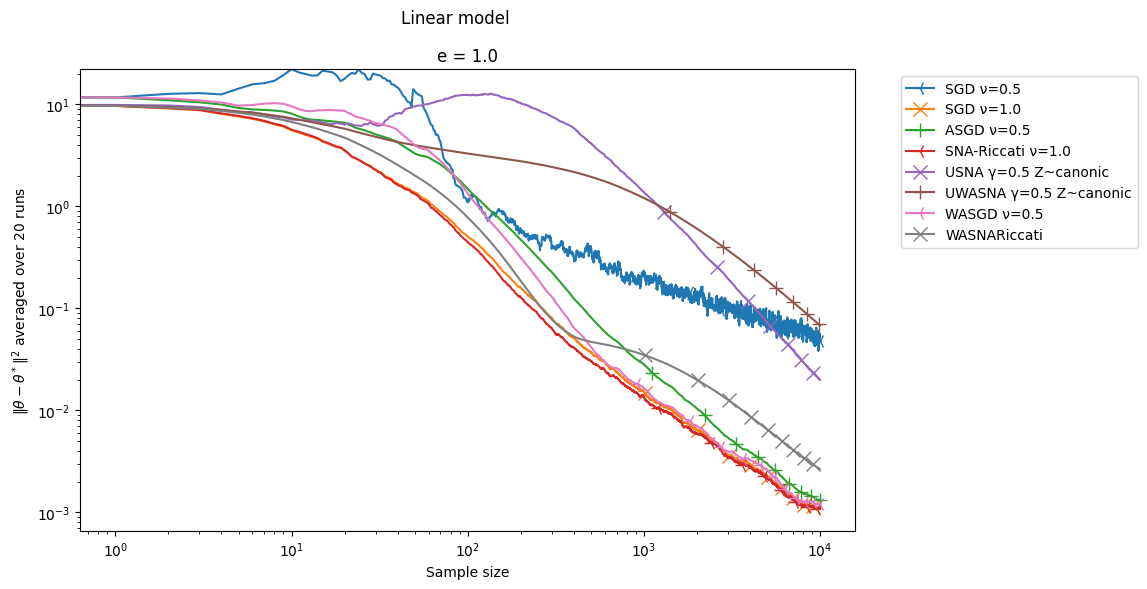

In [ ]:
simulation.run_multiple_datasets(N=N, n=n)